# =============You safe I happy ===============
#### Analyzed by Marco Lin

![](http://52.41.251.138/sites/default/files/2017-11/crime%20rate_0.jpg)

#### Our company is Decrime. We dedicate to police enforcement optimization. This project we focus on the analysis of crimes to explore the information of crimes for our customers. 
#### At first, we will explore in four aspects of dataset. In this part, we can understand the tendency of crimes in 40 years (from 1975 to 2015). We will show what kind of crimes take up most all of crimes. In addition, we will find out which city has most crimes in 40 years. In addition, the correlation between population and crimes is our focus as well. 
#### Furthermore, we will concentrate on California. This is because our customers are from California. They may be interested in the fact in this state. Also, we will compare with different Periods of time to see the changing. 
#### Then, we will choose one city in California to see what kind of crimes happen most. Second, we will see what the city is safest recently. And showing the percentage of different crimes type. At the end, the report will finish with summery and recommendations. 

## =======preparation==========

In [1]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
crimes = pd.read_csv("../week8crime/report.csv")
%matplotlib inline

In [2]:
crimes.describe()

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
count,2829.000000,2.760000e+03,2.794000e+03,2795.000000,2754.000000,2753.000000,2754.000000,2692.000000,2794.000000,2795.000000,2754.000000,2753.000000,2754.000000
mean,1995.000000,7.956981e+05,2.963255e+04,398.385331,416.278867,4405.146023,4000.245098,11.868871,1093.049810,15.372812,59.305167,566.595434,459.968112
std,11.834251,1.012451e+06,1.728630e+05,2281.276402,479.811934,6977.293769,8653.902965,1.118194,676.884678,12.350640,31.971570,369.436996,340.903534
min,1975.000000,1.007630e+05,1.540000e+02,1.000000,15.000000,15.000000,83.000000,0.000000,16.490000,0.210000,1.640000,1.610000,11.460000
25%,1985.000000,3.779310e+05,3.014750e+03,32.000000,176.250000,1467.000000,1032.000000,12.000000,625.082500,6.955000,35.775000,319.090000,210.242500
50%,1995.000000,5.366145e+05,5.135500e+03,64.000000,291.000000,2597.000000,1940.000000,12.000000,949.680000,11.980000,55.900000,487.480000,374.400000
75%,2005.000000,8.168558e+05,9.058500e+03,131.000000,465.000000,4556.000000,3609.750000,12.000000,1409.507500,20.230000,77.797500,728.240000,612.005000
max,2015.000000,8.550861e+06,1.932274e+06,24703.000000,3899.000000,71030.000000,107475.000000,12.000000,4352.830000,94.740000,199.300000,2368.220000,2337.520000


In [3]:
crimes.columns

Index(['report_year', 'agency_code', 'agency_jurisdiction', 'population',
       'violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies',
       'months_reported', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita'],
      dtype='object')

In [4]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
report_year            2829 non-null int64
agency_code            2788 non-null object
agency_jurisdiction    2829 non-null object
population             2760 non-null float64
violent_crimes         2794 non-null float64
homicides              2795 non-null float64
rapes                  2754 non-null float64
assaults               2753 non-null float64
robberies              2754 non-null float64
months_reported        2692 non-null float64
crimes_percapita       2794 non-null float64
homicides_percapita    2795 non-null float64
rapes_percapita        2754 non-null float64
assaults_percapita     2753 non-null float64
robberies_percapita    2754 non-null float64
dtypes: float64(12), int64(1), object(2)
memory usage: 331.6+ KB


## ===========Data Exploration=============

### A. Total violent Crimes Tendency from 1975 to 2015 in USA

In [5]:
crime_rate = crimes.groupby(by = "report_year").sum()
crime_rate1 = crime_rate["violent_crimes"]
crime_rate2 = crime_rate[["homicides","rapes","assaults","robberies"]]

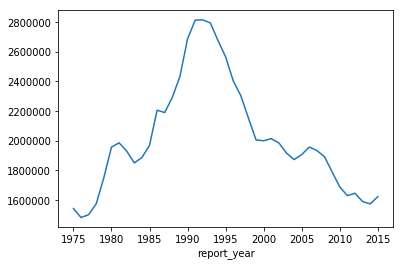

In [6]:
crime_rate1.plot() 

### Explanation:
The events of crimes from 1975 to 1990 was going up from 1600000 to 2800000. Then, after 1995, the number decreased.

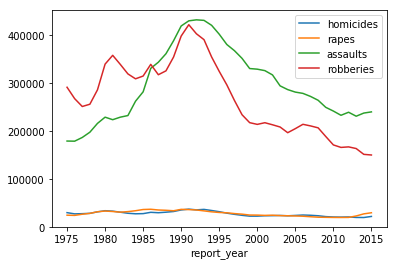

In [7]:
crime_rate2.plot() 

### Explanation:
It appears that number of assaults has dramaticly increased from 1985 to 1992. Also, the number of robberies has noticeably increased from 1987 to 1992 as well. Then, they both have decreased from 1995. The number of homicides and rapes are steady.

### B. In 40 years, the cities which has high violentest crimes

In [8]:
rank_crime = crimes.groupby(by = "agency_jurisdiction").sum()

In [9]:
rank_crime1 = rank_crime.sort_values(by= "violent_crimes", ascending=[False]).head(10)
rank_crime1[["violent_crimes","population"]]

,violent_crimes,population
agency_jurisdiction,,
United States,58163955.0,0.0
"New York City, NY",4263284.0,313777539.0
"Los Angeles, CA",1979166.0,142984519.0
"Chicago, IL",1960886.0,118467098.0
"Detroit, MI",918003.0,41436021.0
"Houston, TX",819539.0,76033056.0
"Philadelphia, PA",763201.0,65551379.0
"Baltimore, MD",600630.0,29297653.0
"Dallas, TX",590468.0,44640012.0


### Explanation:
In this 40 years, New York City has over 4200000 violent crimes happens. 

In [10]:
crimes_NewYork = crimes[(crimes['agency_jurisdiction'] == "New York City, NY")]
crimes_NewYork1 = crimes_NewYork[['report_year','violent_crimes', 'population']]

In [11]:
crimes_NewYork2 = crimes_NewYork1.groupby(by = "report_year").sum()

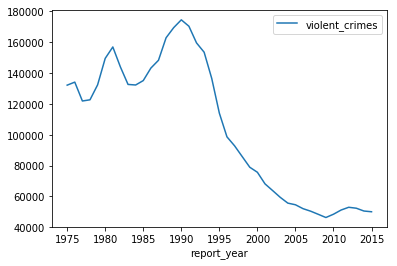

In [12]:
crimes_NewYork2.plot(y='violent_crimes')

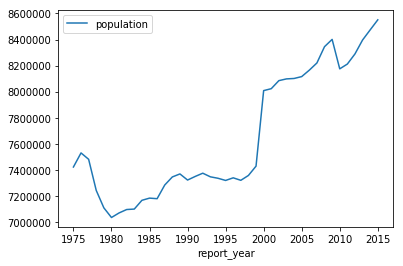

In [13]:
crimes_NewYork2.plot(y='population')

### Explanation:
In this two figures, we can understand the population of New York City are increasing from 1995. And, the number of crimes are decreasing from 1990. It seems that the New York City has a bunch number of crimes becasue of it's populaton. Comparing with the its past, the city are getting safe. 

### C. The crimes in California

In [14]:
crimes_in_CA = crimes[(crimes['agency_jurisdiction'] == "Oakland, CA") |
       (crimes['agency_jurisdiction'] == "Long Beach, CA" ) |
      (crimes['agency_jurisdiction'] == "Los Angeles County, CA" ) |
      (crimes['agency_jurisdiction'] == "Los Angeles, CA" ) |
      (crimes['agency_jurisdiction'] == "Sacramento, CA" ) |
      (crimes['agency_jurisdiction'] == "San Francisco, CA" ) |
      (crimes['agency_jurisdiction'] == "San Jose, CA" ) |
      (crimes['agency_jurisdiction'] == "Fresno, CA" ) |
      (crimes['agency_jurisdiction'] == "San Diego, CA" )]

In [15]:
crimes_in_CA1 = crimes_in_CA.groupby(by = "agency_jurisdiction").sum()
crimes_in_CA1.sort_values(by= "crimes_percapita", ascending=[False]).head(10)

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
agency_jurisdiction,,,,,,,,,,,,,
"Oakland, CA",81795,15490811.0,280043.0,4475.0,14574.0,126237.0,134757.0,468.0,74332.67,1190.96,3906.72,33377.60,35857.39
"Los Angeles, CA",81795,142984519.0,1979166.0,25999.0,69748.0,1027731.0,855688.0,480.0,57819.00,769.39,2089.38,29763.86,25196.38
"San Francisco, CA",81795,30759868.0,360218.0,3588.0,14555.0,136130.0,205945.0,480.0,48815.45,488.45,1999.53,18353.16,27974.34
"Los Angeles County, CA",81795,42083296.0,426589.0,6270.0,14827.0,287532.0,117960.0,480.0,42042.71,617.05,1449.17,28367.84,11608.67
"Long Beach, CA",81795,17562745.0,175503.0,2456.0,7505.0,76344.0,89198.0,480.0,41604.22,588.62,1823.30,17771.23,21421.07
"Sacramento, CA",81795,15570963.0,154466.0,1963.0,7432.0,75781.0,69290.0,480.0,41535.93,546.17,2096.25,19920.05,18973.45
"Fresno, CA",81795,14976953.0,137711.0,1904.0,6328.0,73621.0,55858.0,480.0,38975.92,565.87,1931.64,20011.64,16466.80
"San Diego, CA",81795,46189196.0,308976.0,3149.0,15165.0,182919.0,107743.0,480.0,27736.65,294.11,1377.98,16006.34,10058.31
"San Jose, CA",81795,33186359.0,167548.0,1513.0,14290.0,106707.0,45038.0,480.0,21029.55,198.50,1852.62,13134.74,5843.69


### Explanation:
In California, the data in this 40 years, according to the crimes per capita, Okland is the most dangerous city.

### C.2) The Crimes in California in 2015

In [29]:
crimes_in_CA_2000 = crimes_in_CA[(crimes_in_CA['report_year'] == 2015)]

In [30]:
crimes_in_CA_2000_1 = crimes_in_CA_2000.groupby(by = "agency_jurisdiction").sum()
crimes_in_CA_2000_1.sort_values(by= "crimes_percapita", ascending=[False]).head(10)

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
agency_jurisdiction,,,,,,,,,,,,,
"Oakland, CA",2015,419481.0,6051.0,85.0,285.0,2391.0,3290.0,0.0,1442.50,20.26,67.94,569.99,784.30
"San Francisco, CA",2015,863782.0,6710.0,53.0,344.0,2703.0,3610.0,0.0,776.82,6.14,39.82,312.93,417.93
"Sacramento, CA",2015,489717.0,3611.0,43.0,105.0,2289.0,1174.0,0.0,737.36,8.78,21.44,467.41,239.73
"Los Angeles, CA",2015,3962726.0,25156.0,282.0,2209.0,13713.0,8952.0,0.0,634.82,7.12,55.74,346.05,225.91
"Long Beach, CA",2015,476318.0,2766.0,36.0,177.0,1499.0,1054.0,0.0,580.70,7.56,37.16,314.71,221.28
"Fresno, CA",2015,520837.0,2871.0,39.0,167.0,1653.0,1012.0,0.0,551.23,7.49,32.06,317.37,194.30
"Los Angeles County, CA",2015,1111939.0,5173.0,98.0,304.0,3559.0,1212.0,0.0,465.22,8.81,27.34,320.07,109.00
"San Diego, CA",2015,1400467.0,5582.0,37.0,566.0,3601.0,1378.0,0.0,398.58,2.64,40.42,257.13,98.40
"San Jose, CA",2015,1031458.0,3400.0,30.0,375.0,1855.0,1140.0,0.0,329.63,2.91,36.36,179.84,110.52


### Explanation:
We concentated on 2015 the recent data, most dangerous city is still Oakland. Others are San franciso, Saramento

### D. Oakland Crimes Analysis

In [58]:
crimes_in_CA_OKA = crimes_in_CA_2000[(crimes_in_CA_2000['agency_jurisdiction'] == 'Oakland, CA')]
crimes_in_CA_OKA

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
2803,2015,CA00109,"Oakland, CA",419481.0,6051.0,85.0,285.0,2391.0,3290.0,NaN,1442.5,20.26,67.94,569.99,784.3


(-1.1109203616822707,
 1.1111485148335918,
 -1.140576631347584,
 1.7298916687925672)

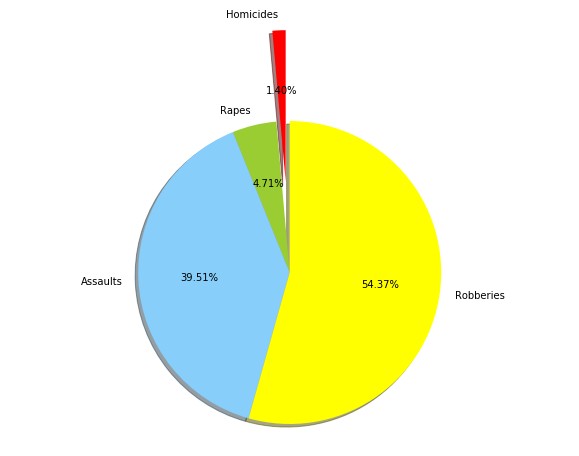

In [59]:
plt.figure(figsize=(10,8)) #调节图形大小
labels = [u'Homicides',u'Rapes',u'Assaults',u'Robberies'] #定义标签
sizes = [85.0,285.0,2391.0,3290.0] #每块值
colors = ['red','yellowgreen','lightskyblue','yellow'] #每块颜色定义
explode = (0.6,0,0,0) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = True, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.axis('equal')

### Explanation:
We analyzed the percentage of crimes in Oakland. Robberies take up 54.3% and Assaults is 39%

## ===========One column selection=============

In [19]:
crimes1 = pd.read_csv("../week8crime/report.csv", index_col=2)
crimes1_in2015 = crimes1[(crimes1['report_year'] == 2015)]
crimes1_in2015_1 = crimes1_in2015.sort_values(by= "crimes_percapita", ascending=[True]).head(10)
crimes1_in2015_1['crimes_percapita']

agency_jurisdiction
Fairfax County, VA        88.41
Nassau County, NY        124.20
Suffolk County, NY       124.86
Virginia Beach, VA       138.25
Montgomery County, MD    194.61
Honolulu, HI             243.87
San Jose, CA             329.63
El Paso, TX              366.58
Austin, TX               372.53
United States            372.60
Name: crimes_percapita, dtype: float64

### Explanation:
It appears that the safest city in USA is Fairfax County, VA with only 88.41 crimes per capita.

![](http://pics2.city-data.com/city/maps/fr1789.png)

## ================Sort=================

In [20]:
data_sort = crimes[['report_year','homicides','rapes','assaults','robberies']]
data_sort.columns

Index(['report_year', 'homicides', 'rapes', 'assaults', 'robberies'], dtype='object')

### Explanation:
By those columns, we could understand what the consist of crimes in each year.

## ===============Series=================

In [21]:
data_series = data_sort.groupby(by = "report_year").sum()
data_series.tail(10)

,homicides,rapes,assaults,robberies
report_year,,,,
2006,24693.0,22190.0,278598.0,214051.0
2007,24179.0,21141.0,272239.0,210704.0
2008,23180.0,20160.0,264209.0,206677.0
2009,21384.0,19895.0,249491.0,188615.0
2010,20589.0,19660.0,241700.0,171034.0
2011,20363.0,19573.0,232878.0,165825.0
2012,20675.0,19709.0,239243.0,166938.0
2013,19663.0,22739.0,230952.0,163472.0
2014,19513.0,27107.0,237519.0,151336.0


### Explanation:
It seems that the numbers of each type are almost same, but the assaults in average has higher chances to happend. The order of crimes frequency is assaults, robberies, homicides, rapes.

## ==============Summary================

According our analysis, the number of crimes is decreasing in general. The highest number of crimes was in 1990 to 1995. And in this 40 years, New York City has most highest crimes happens. But the reason is the increasing of population. Fortunately, along with increasing of population in New York, the rate of crimes is decreasing. In addition, in California, according to crimes per capita, Oakland not just was the most dangerous city but also is the most dangerous city in 2015. Comparing with crime per capita in 2015, in the rank of dangerous city, Oakland is first, San Francisco is second, Sacramento is third. By analyzing the consist of crimes in Oakland, 54 percent is Robberies and 39 percent is Assaults. We also find the safest city on USA is Fairfax, VA. It only has 88 crimes per capita. So, by exploring the data, from 2006 to 2015, assaults are most happens. And, second is Robberies.

## ===========Recommendations=============

The crime in Oakland City is the problem now. But also Oakland city may be a good research objectives to find how to effectively decrease the crimes. In general, the rate of assaults and robberies are still super higher than homicides and rapes. We can focus on how to prevent this two and also enhance the police enforcement effectiveness on this two to decrease it and build a safer country. 